<a href="https://colab.research.google.com/github/tawanyb/tawanyb/blob/main/desafio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans ,DBSCAN,MeanShift
from sklearn.cluster import k_means,dbscan,mean_shift,estimate_bandwidth
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA



In [2]:
# lendo arquivo

df = pd.read_csv("/content/data.csv", encoding='latin-1')

# Iniciando tratamento dos dados analise exploratoria dos dados :
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213216 entries, 0 to 213215
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    213216 non-null  object 
 1   StockCode    213216 non-null  object 
 2   Description  212377 non-null  object 
 3   Quantity     213215 non-null  float64
 4   InvoiceDate  213215 non-null  object 
 5   UnitPrice    213215 non-null  float64
 6   CustomerID   151804 non-null  float64
 7   Country      213215 non-null  object 
dtypes: float64(3), object(5)
memory usage: 13.0+ MB


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,213215.000000,213215.000000,151804.000000
mean,9.311882,5.016050,15274.168177
std,233.381060,93.596673,1725.757266
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13821.000000
50%,3.000000,2.100000,15144.000000
75%,10.000000,4.210000,16809.000000
max,74215.000000,16888.020000,18287.000000


In [5]:
# identifying null values
null_df = df[df.isna().any(axis=1)]
null_count = df.isna().sum()
print(null_count)

InvoiceNo          0
StockCode          0
Description      839
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     61412
Country            1
dtype: int64


In [6]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      839
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     61412
Country            1
dtype: int64

In [7]:
#dropna
df.dropna

<bound method DataFrame.dropna of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
213211    555524     23170             REGENCY TEA PLATE ROSES       12.0   
213212    555524     23171             REGENCY TEA PLATE GREEN       12.0   
213213    555524     23172               REGENCY TEA PLATE PINK      12.0   
213214    555524     22699     ROSES REGENCY TEACUP AND SAUCER        5.0   
213215    555524     22699                            ROSES REG       NaN   

           InvoiceDate  UnitPrice  CustomerID         Country  
0       12/1/2010 8:26       2.55     17850.0  United Kingdom  
1       12/1/2010 8:26       3.39     17850.0  United Kingdom  
2       12/1/2010 8:26       2.75     17850.0  United Kingdom  
3       12/1/2010 8:26       3.39     17850.0  United Kingdom  
4       12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                ...        ...         ...             ...  
213211  6/5/2011 11:37       1.65     16923.0  United Kingdom  
213212  6/5/2011 11:37       1.65     16923.0  United Kingdom  
213213  6/5/2011 11:37       1.65     16923.0  United Kingdom  
213214  6/5/2011 11:37       2.95     16923.0  United Kingdom  
213215             NaN        NaN         NaN             NaN  

[213216 rows x 8 columns]>

In [8]:
# Identificar valores duplicados
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)

)

df[df.duplicated()]

df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
213210,555524,23170,REGENCY TEA PLATE ROSES,12.0,6/5/2011 11:37,1.65,16923.0,United Kingdom
213212,555524,23171,REGENCY TEA PLATE GREEN,12.0,6/5/2011 11:37,1.65,16923.0,United Kingdom
213213,555524,23172,REGENCY TEA PLATE PINK,12.0,6/5/2011 11:37,1.65,16923.0,United Kingdom
213214,555524,22699,ROSES REGENCY TEACUP AND SAUCER,5.0,6/5/2011 11:37,2.95,16923.0,United Kingdom


In [9]:
#importando date time
import datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
#MUDANDO TYPES COLUNA
df['CustomerID'].isna().sum()
df['CustomerID'].value_counts()
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [17]:
df['InvoiceNo'] = df['InvoiceNo'].apply(lambda x: x if str(x).isnumeric() else 0)
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df.dtypes


InvoiceNo               int64
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [18]:
# PADRONIZANDO OS DADOS PRA MODELO KMEANS

from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df_scaled = df[numerical_cols].apply(scale)
df[numerical_cols] = df_scaled

In [29]:
df_dummies = pd.get_dummies(df, columns=['Description','StockCode','Country'])

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Description'] = label_encoder.fit_transform(df['Description'])
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['Country'] = label_encoder.fit_transform(df['Country'])

In [80]:
df=df.drop(columns='StockCode')

In [81]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df_scaled = df[numerical_cols].apply(scale)
df[numerical_cols] = df_scaled

In [82]:
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0.009315,1.531478,-0.014191,2010-12-01 08:26:00,-0.026348,0.986811,0.268818
1,0.009315,1.539761,-0.014191,2010-12-01 08:26:00,-0.017373,0.986811,0.268818
2,0.009315,-1.022864,-0.005621,2010-12-01 08:26:00,-0.024211,0.986811,0.268818
3,0.009315,-0.159337,-0.014191,2010-12-01 08:26:00,-0.017373,0.986811,0.268818
4,0.009315,0.751819,-0.014191,2010-12-01 08:26:00,-0.017373,0.986811,0.268818


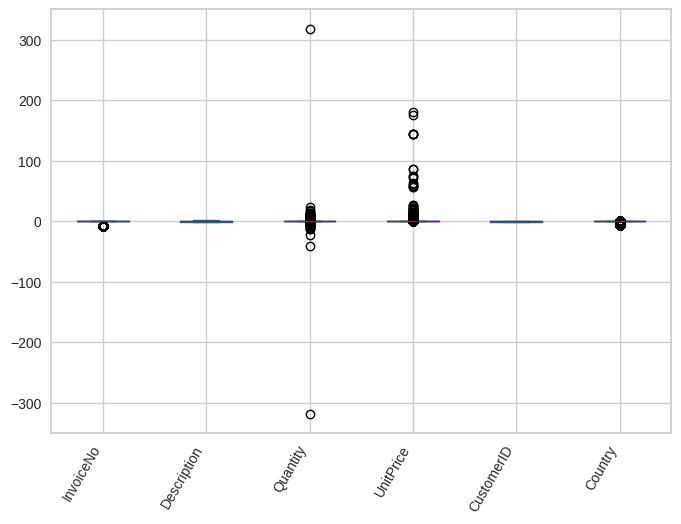

In [83]:
df_scaled.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()


In [84]:
# verificando outilier e removendo

def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [85]:
is_outlier(df.UnitPrice)

0         False
1         False
2         False
3         False
4         False
          ...  
213211    False
213212    False
213213    False
213214    False
213215    False
Name: UnitPrice, Length: 213216, dtype: bool

In [86]:
is_outlier(df.Quantity)

0         False
1         False
2         False
3         False
4         False
          ...  
213211    False
213212    False
213213    False
213214    False
213215    False
Name: Quantity, Length: 213216, dtype: bool

In [87]:
df_outilier= df_scaled.abs().gt(200).any(axis=1)
df_outilier.sum()


2

In [88]:
df_scaled= df_scaled[~df_outilier]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

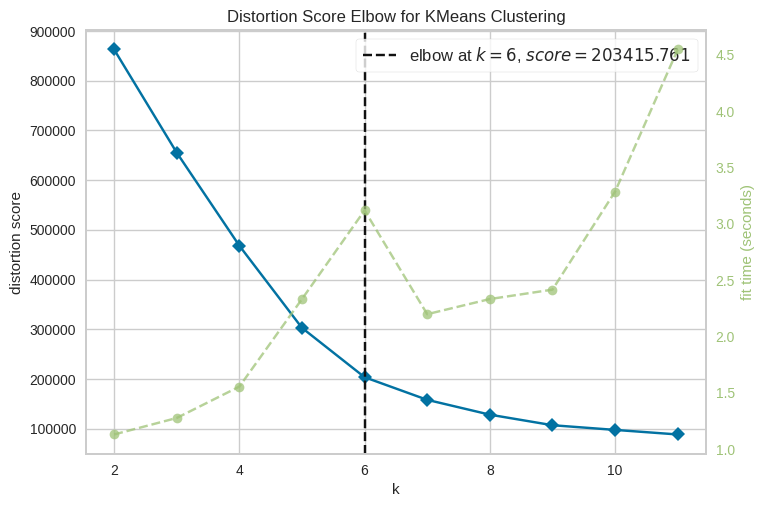

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
# modelo Kmeans visualisação
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)


visualizer = KElbowVisualizer(KMeans(), k=(11))
visualizer.fit(df_scaled_imputed)
visualizer.show()


In [91]:
# vou considerar 5 clusters com base no grafico .
 #CLUSTERIZANDO
model =KMeans(5, random_state=0).fit(df_scaled_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
centroids =model.cluster_centers_
labels= model.labels_

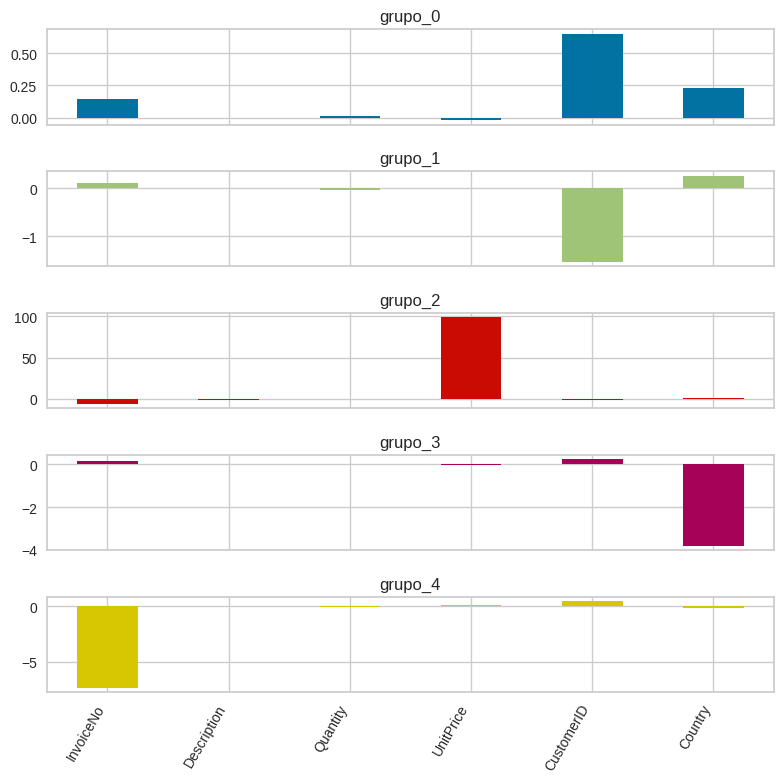

In [93]:
# INTERPRETANDO OS CLUSTERS
# com grafico de barras
(
  pd.DataFrame(centroids, columns=df_scaled_imputed.columns)
  .T.add_prefix('grupo_')
  .plot.bar(subplots=True, figsize=(8, 8), legend=False)
)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# verificando centers

In [94]:
centers=pd.DataFrame(centroids, columns=df_scaled_imputed.columns)
centers

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country
0,0.141097,-0.006047,0.013201,-0.019691,0.651204,0.233429
1,0.121413,0.004693,-0.030822,0.009363,-1.538502,0.268856
2,-6.459452,-1.338723,-0.043177,98.942950,-1.138321,0.268818
3,0.143545,0.039827,0.035657,-0.006561,0.244357,-3.806717
4,-7.337111,0.016766,-0.095256,0.132703,0.478470,-0.184313


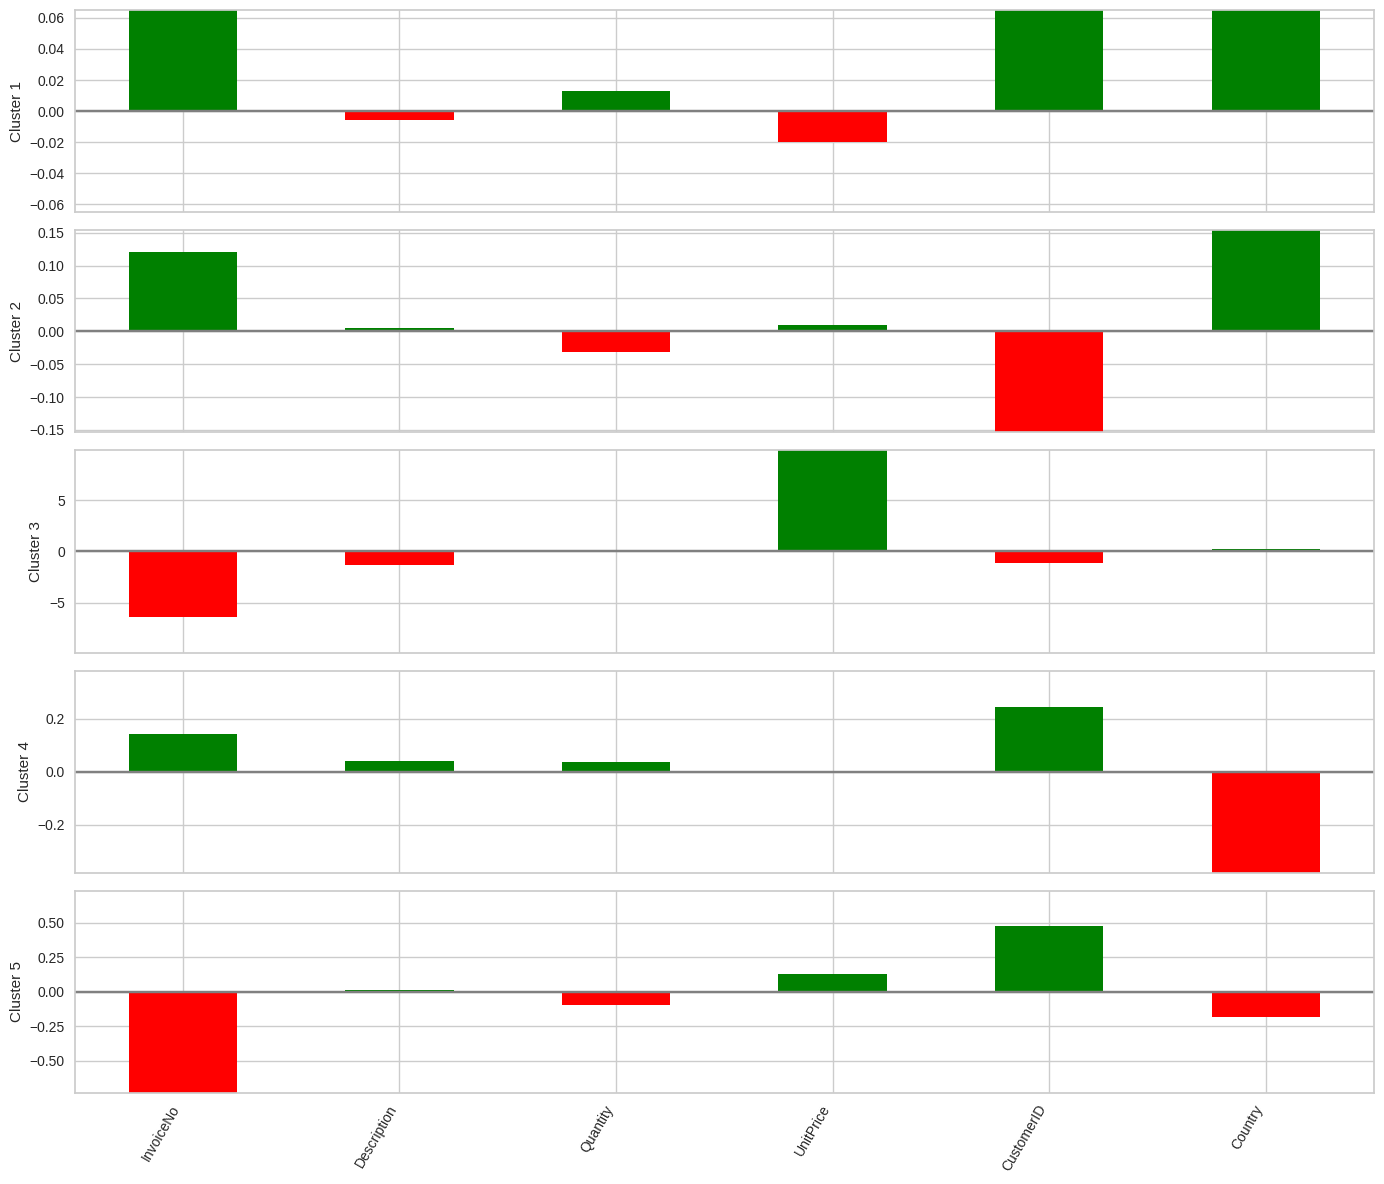

In [125]:
fig, axes = plt.subplots(nrows=5,figsize=(14, 12), sharex=True )

for i,ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 0.1 * center.abs().max()
    colors = ['green' if l > 0 else 'red' for l in center]
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC,maxPC)
    ax.axhline(0,color='gray')
    ax.xaxis.set_ticks_position('none')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [113]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_scaled_imputed[~outlier_rows])
labels = model.labels_

<ipython-input-113-931e3f5bf383>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model.fit(df_scaled_imputed[~outlier_rows])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
(
        df_scaled[~outlier_rows].assign(cluster=labels)
.groupby('cluster')
.mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd')
)

<ipython-input-122-f745e9e2c690>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_scaled[~outlier_rows].assign(cluster=labels)


cluster,0,1,2,3,4
InvoiceNo,0.120261,0.139479,0.140192,-7.149410,0.140590
Description,0.007340,-0.818082,0.040903,0.024530,0.885911
Quantity,-0.030685,0.011791,0.038458,-0.092835,0.014312
UnitPrice,-0.009360,-0.022615,-0.017872,-0.008068,-0.022194
CustomerID,-1.536386,0.652388,0.245579,0.507621,0.649872
Country,0.268296,0.237956,-3.776758,-0.181408,0.231021


In [124]:
(
        df_scaled_imputed[~outlier_rows].assign(cluster=labels)
.groupby('cluster')
.mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd')
)

<ipython-input-124-5a703265e50a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_scaled_imputed[~outlier_rows].assign(cluster=labels)


cluster,0,1,2,3,4
InvoiceNo,0.121274,0.140009,0.143815,-7.337111,0.142221
Description,0.004751,-0.821203,0.040369,0.010998,0.889647
Quantity,-0.030844,0.011723,0.038156,-0.096096,0.014239
UnitPrice,0.001784,-0.021854,-0.010777,0.235578,-0.017667
CustomerID,-1.538502,0.652548,0.245310,0.487423,0.650154
Country,0.268857,0.238097,-3.794187,-0.181216,0.230838


In [126]:
silhouette_score(df_scaled_imputed[~outlier_rows], labels)

<ipython-input-126-164c94dc1d35>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  silhouette_score(df_scaled_imputed[~outlier_rows], labels)


0.5281854032226854

In [127]:
# DESCREVENDO COMPORTAMENTO DAS COMPRAS POR CLUSTER :
# CLUSTER 0 : OS CLIENTES SAO POUCOS -1% E COMPRAM COM MENAS FREQUENCIA E PRODUTOS DE VALOR MEDIO COM BAIXA QUANTIDADE DE PRODUTOS VENDIDOS  .
# CLUSTER 1 : OS CLIENTES SAO A MAIORIA DOS CLIENTES 55% E COMPRAM COM FRENQUENCIA PRODUTOS BAIXO VALOR COM QUANTIDADE MEDIA DE PRODUTOS VENDIDOS.
# CLUSTER 2 : OS CLIENTES SAO  POUCOS 9% E COMPRAM COM BOA FREQUENCIA E PRODUTOS DE VALORES BAIXO COM QUATINDADES ALTA DE PRODUTOS VENDIDOS .
# CLUSTER 3 : OS CLIENTES SAO POUCOS 15% E COMPRAM COM BAIXA FREQUENCIA E PRODUTOS DE VALORES ALTOS  COM QUATINDADES PEQUENA DE PRODUTOS VENDIDOS.
# CLUSTER 4 : OS CLIENTES SAO MEDIA 30% E COMPRAM COM MEDIA FREQUENCIA E PRODUTOS DE VALORES BAIXOS  COM QUATINDADES PEQUENA DE PRODUTOS VENDIDOS.

# COM BASE NESSAS ANALISES PODEMOS IDENTIFICAR :
# QUAIS OS TIPOS DE PRODUTOS ESTAO SENDO MAIS ADQUIRIDO POR CADA CLUSTER,
# MELHORAR A OFERTA DOS PRODUTOS POUCO VENDIDO .
# PODEMOS INDENTIFICAR QUAIS CLIENTES SAO FREQUENTES E MELHORAR RELACIONAMENTOS COM ELES
# REALIZAR MUITAS MELHORIAS NO SETORES DE VENDAS E MARKETING .